it is usually used for binary classification.
then we will see how can we use it for multiple class regression.
it is not regression but a classification.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

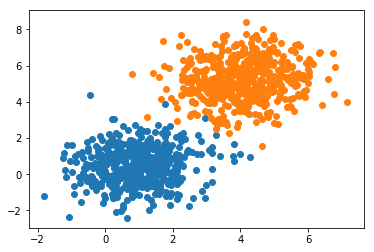

In [48]:
np.random.seed(1)
mean1=np.array([1,0.5])
cov1=np.array([[1,0.1],[0.1,1]])
mean2=np.array([4,5.2])
cov2=np.array([[1,0.1],[0.1,1.2]])
dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
plt.show()


In [49]:
rows=1000
cols=3
data=np.zeros((rows,cols))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]+=1
np.random.shuffle(data)
data[:10]

array([[0.38016445, 1.52898138, 0.        ],
       [0.35586601, 0.89989623, 0.        ],
       [4.20373188, 5.73598748, 1.        ],
       [1.48914612, 0.76578177, 0.        ],
       [2.29929439, 4.74505872, 1.        ],
       [4.16216528, 3.45704311, 1.        ],
       [4.77414983, 3.30193427, 1.        ],
       [3.23727808, 4.47898565, 1.        ],
       [4.07703762, 3.93339666, 1.        ],
       [4.13705159, 6.68665955, 1.        ]])

In [51]:
split=int(0.7*1000)
X_train=data[:split,:2]
X_test=data[:split,:2]
y_train=data[:split,-1]
y_test=data[split:,-1]
print(X_train.shape)

(700, 2)


In [52]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def hypothesis(X,W,b):
    h=(X*W).sum()+b
    return sigmoid(h)
def get_error(X,W,y_true,b):
    err=0
    m=X.shape[0]
    for i in range(m):
        if y_true[i]==0:
            err+=np.log(1-hypothesis(X[i],W,b))
        else:
            err+=np.log(hypothesis(X[i],W,b))
    err=err/m
    return err
            

In [21]:
# w0X1+w1x1+W2x2=
#b+w1x1+w2x2

In [53]:
def get_grad(X,W,y_true,b):
    gradW=np.zeros(W.shape[0])
    gradb=0
    m=X.shape[0]
    for i in range(m):
        gradW+=(y_true[i]-hypothesis(X[i],W,b))*X[i]
        gradb+=(y_true[i]-hypothesis(X[i],W,b))
    gradW=gradW/m
    gradb=gradb/m
    return[gradW,gradb]

In [54]:
def optimizer(X,W,y_true,b,learning_rate=0.1):
    error=get_error(X,W,y_true,b)
    [gradW,gradb]= get_grad(X,W,y_true,b)
    W=W+learning_rate*gradW
    b=b+learning_rate*gradb
    return error,W,b
    

In [55]:
loss=[]
W=np.array([0.5,0.5])
b=10
for i in range(400):
    err,W,b=optimizer(X_train,W,y_train,b,learning_rate=0.1)
    loss.append(err)
print(W)
print(b)

[-0.34329109  1.14236148]
-1.4356856170838332


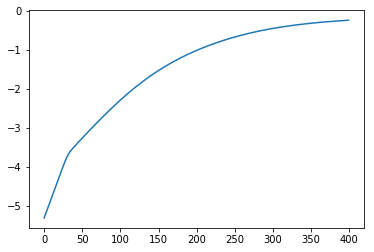

In [56]:
plt.plot(loss)
plt.show()

In [66]:
def predict(x_sample,W,b):
    h=hypothesis(x_sample,W,b)
    if h>0.5:
        return 1
    else:
        return 0
print(predict(X_train[0],W,b),y_train[0])
    
#for i in range(X_test.shape[0]):
 #   print(predict(X_test[i],W,b),y_test[i])

1 0.0


In [112]:

def acc(X_test,y_test,W,b):
    predicted=[]
    m=X_test.shape[0]
    for i in range(X_test.shape[0]):
        predicted.append(predict(X_test[i],W,b))
    predicted=np.asarray(predicted)
    return (predicted==y_test).sum()*100/m

In [113]:
acc(X_test,y_test,W,b)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


AttributeError: 'bool' object has no attribute 'sum'